## CONTEXT
> This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


## GOALS  

> To predict the house price around King County, which includes Seattle.

### Features Explanation:  

**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [1]:
# Import Common Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, FastMarkerCluster
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
df = pd.read_csv('kc_house_data.csv', parse_dates=['date'])

In [4]:
pd.options.display.max_columns = 999

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
### Data Exploration

In [7]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].unique()
    ])

In [8]:
descr = pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])
descr

,Features,D types,Null,Null%,Unique,Unique Value
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087..."
1,date,datetime64[ns],0,0.0,372,"[2014-10-13T00:00:00.000000000, 2014-12-09T00:..."
2,price,float64,0,0.0,4028,"[221900.0, 538000.0, 180000.0, 604000.0, 51000..."
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]"
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060..."
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ..."
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


- After a few exploration at the data, fortunately, there are no missing values.
- All datatypes also tidy, already numeric.  


### EDA
- View data from basic features of a house: Bedroom, Bathroom, Floors

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


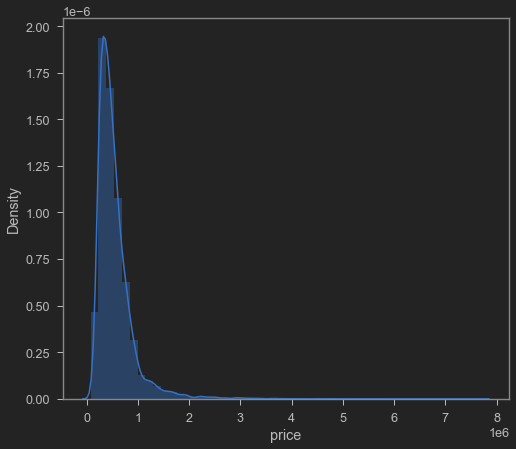

In [11]:
sns.distplot(df['price']);
# price distribution 

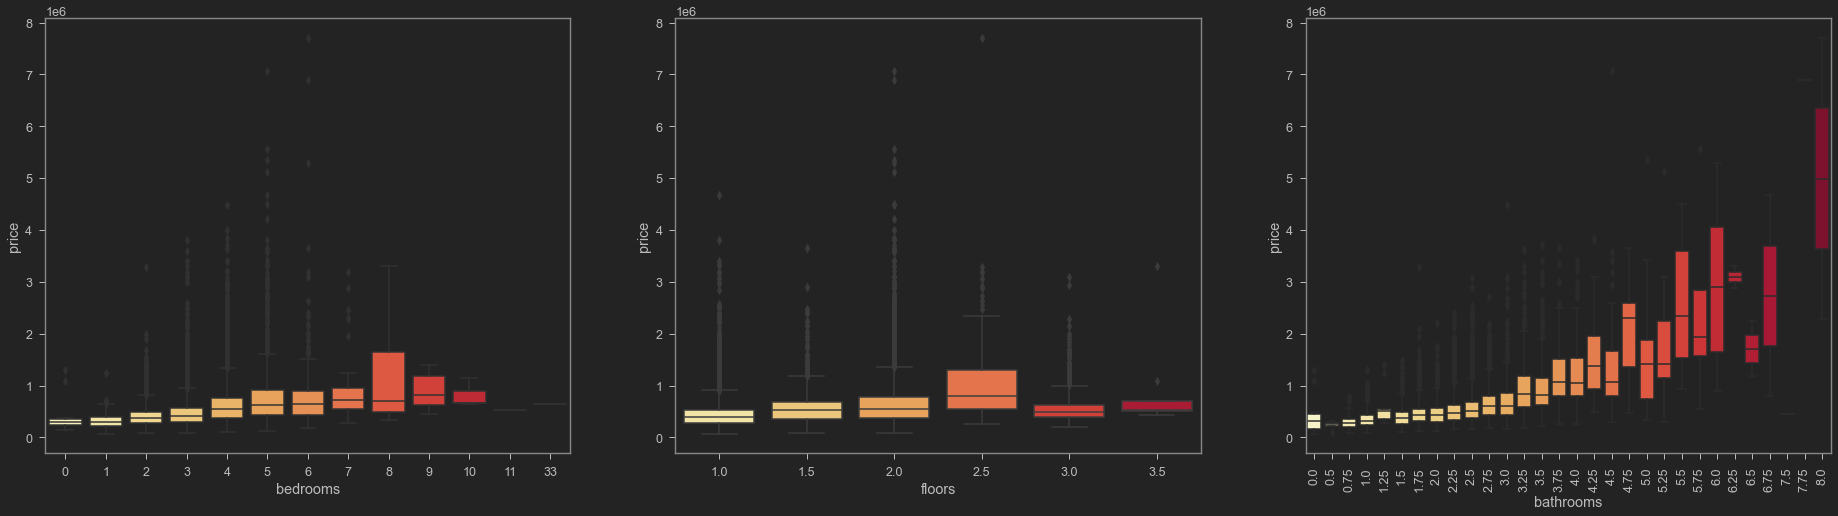

In [13]:
f, axes = plt.subplots(1, 3,figsize=(32,8))
sns.boxplot(x=df['bedrooms'],y=df['price'], palette='YlOrRd',ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'],palette='YlOrRd', ax=axes[1])
sns.boxplot(x=df['bathrooms'],y=df['price'], palette='YlOrRd',ax=axes[2])
plt.xticks(rotation=90)

# sns.lmplot(x='bathrooms',y='price',data=df, palette='YlOrRd',height=5);
plt.show()

We could see from the above graph, bathrooms seems have a positive linear relationship and we could also see lots of outliers seen in all the basic feature of a house vs price.
In bedrooms, there is an odd number 33, seems like an outlier. We need to check it.

In [14]:
df[df['bedrooms']>30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [15]:
df[(df['bedrooms']<30) & (df['price']>600000)].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336


In [16]:
df.drop(df[df['bedrooms']>30].index,inplace=True)

After comparing it with other data, a house with 33 bedrooms with 1620 sqft living seems impossible. Since its only 1 data, I decide to drop it.

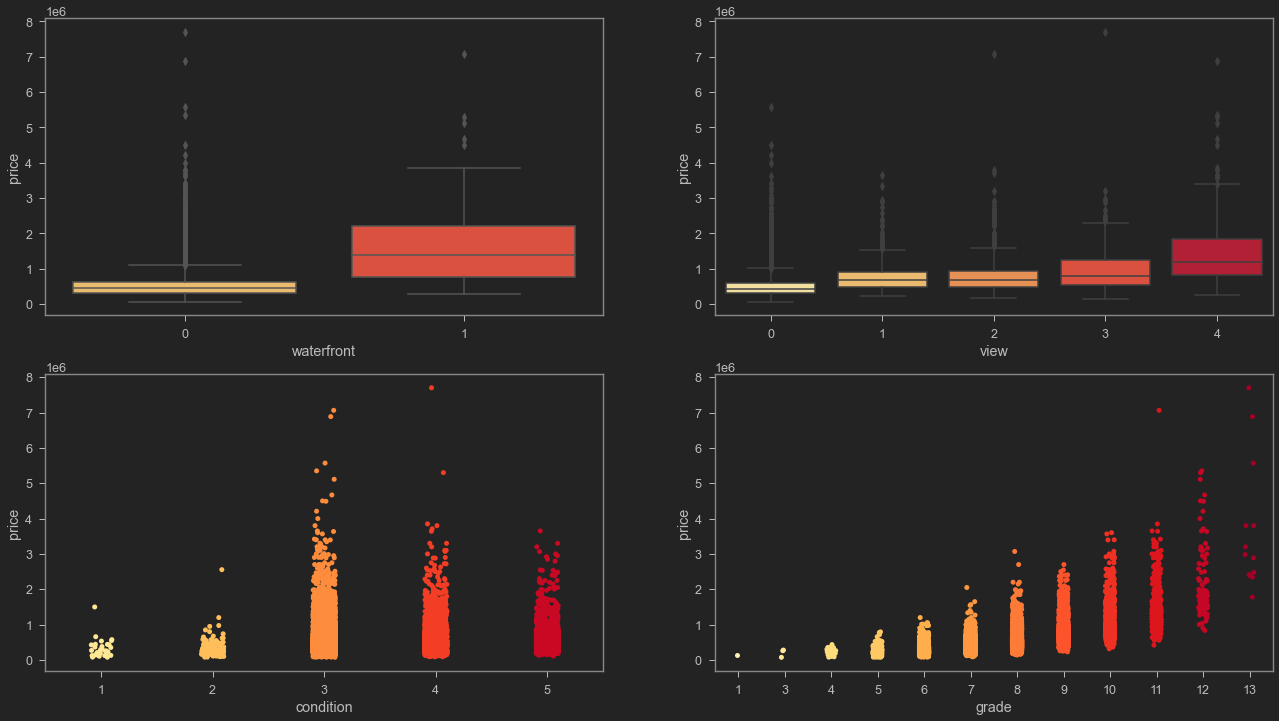

In [13]:
f, axes = plt.subplots(2, 2,figsize=(22,12))
sns.boxplot(x=df['waterfront'],y=df['price'], palette='YlOrRd',ax=axes[0][0])
sns.boxplot(x=df['view'],y=df['price'],palette='YlOrRd', ax=axes[0][1])
sns.stripplot(x=df['condition'],y=df['price'],palette='YlOrRd', ax=axes[1][0])
sns.stripplot(x=df['grade'],y=df['price'],palette='YlOrRd', ax=axes[1][1])
plt.show()

- It seems grade has positive linear relationship with price, waterfront also shows quite significant impact on price. View doesnt show a strong linear relationship, whilst from condition, we could see most of the house are on 3rd grade.

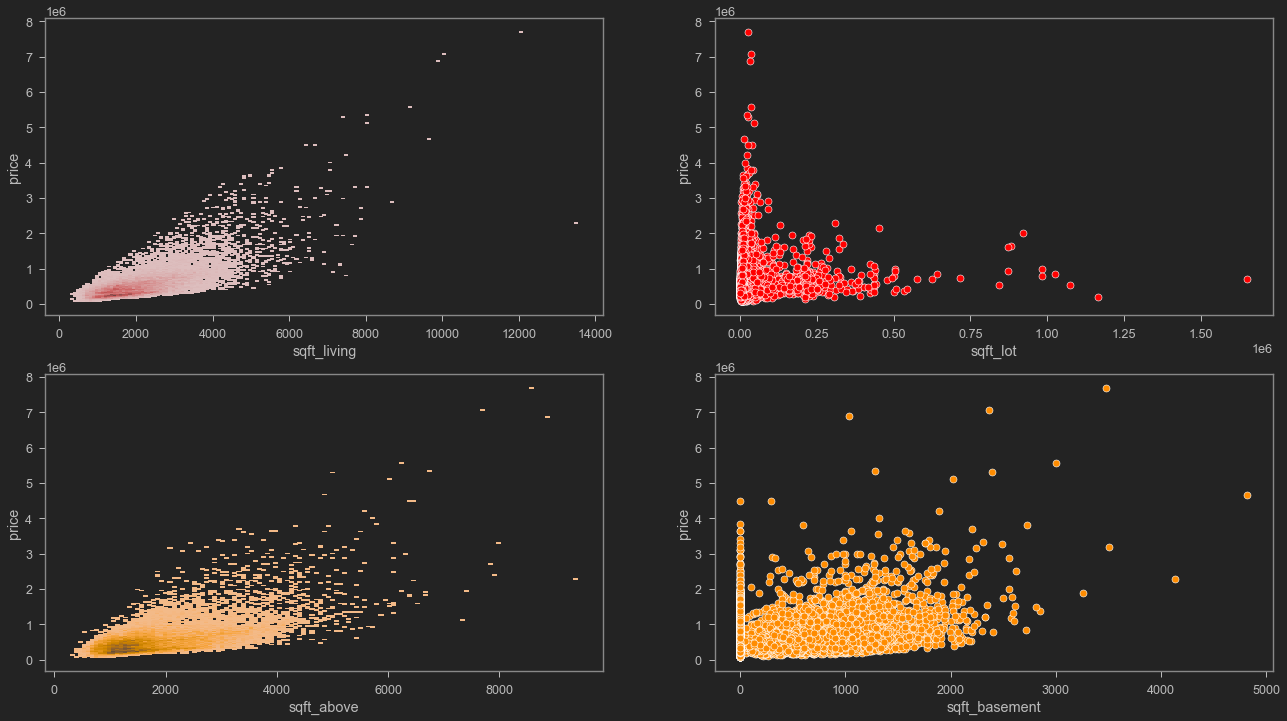

In [14]:
f, axes = plt.subplots(2, 2,figsize=(22,12))
sns.histplot(data=df, x='sqft_living', y='price',color='indianred',ax=axes[0][0]);
sns.scatterplot(data=df, x='sqft_lot', y='price',color='red',ax=axes[0][1]);
sns.histplot(data=df, x='sqft_above', y='price',color='orange',ax=axes[1][0]);
sns.scatterplot(data=df, x='sqft_basement', y='price',color='darkorange',ax=axes[1][1]);

In [15]:
df_1 = df[['price','sqft_basement','sqft_lot']]
df_1.describe().T
# sns.lmplot(data=df, x='sqft_living', y='price')
# sns.lmplot(data=df, x='sqft_above', y='price')

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0
sqft_basement,21613.0,291.509045,442.575043,0.0,0.0,0.0,560.0,4820.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0


In [16]:
df[['sqft_basement']].min()

sqft_basement    0
dtype: int64

- From sqft_living and sqft_above pretty much shown a positive linear relationship.
- We could see not all house has a basement and from sqft lot shows non positve-linear relationship, which I thought the bigger the sqft lot the higher price it would be.

In [18]:
df_new = df[df['price']>=2000000].sort_values('price',ascending=False).head(100)

In [19]:
df_new.reset_index(inplace=True)

In [20]:
df_new

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3020,3377900195,2014-09-29,2525000.0,4,5.50,6930,45100,1.0,0,0,4,11,4310,2620,1950,1991,98006,47.5547,-122.144,2560,37766
96,17558,7631800015,2015-04-07,2510000.0,3,3.25,5480,57990,2.0,1,4,3,11,5480,0,1991,0,98166,47.4558,-122.371,2500,22954
97,4032,5700003585,2014-12-29,2500000.0,5,3.25,5620,12672,2.0,0,0,4,11,4140,1480,1916,0,98144,47.5786,-122.287,4470,8050
98,7311,6072800170,2015-04-28,2500000.0,4,4.00,3330,24354,1.0,0,0,4,10,3330,0,1961,0,98006,47.5708,-122.192,3880,25493


In [21]:
map1 = folium.Map(
    location=[47.5316, -122.233],
    zoom_start=10.5,
    tiles='cartodbdark_matter'
)

for i in range(len(df_new['id'])):
    lat,lon= df_new['lat'][i],df_new['long'][i]
    df_tooltips = "Price"
    df_popup= f"Price ${df_new['price'][i]:,} Zipcode: {df_new['zipcode'][i]}"
    icons = folium.Icon(color='lightgray',icon_size=(35,35))

    folium.Marker(
        [lat,lon],
        popup= df_popup,
        icon = icons
    ).add_to(map1)

HeatMap(
    data=df.loc[:, ['lat', 'long', 'price']],
    radius=10
).add_to(map1)

map1

#### In the dataset, we have latitude and longtitude information for the houses. By using lat and long columns, I displayed the above heat map which that shows the location of the house in Seattle.  
#### I also marked the top 100 most expensive houses in Seattle, to give a picture which area/neighbourhood are expensive.

In [21]:
# Checking id total unique values
df['id'].nunique()

21436

In [22]:
df.shape

(21613, 21)

In [23]:
duplicateDFRow = df[df['id'].duplicated()] # check if theres any duplicates of ID

In [24]:
duplicateDFRow

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,2015-02-19,645000.0,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,2014-12-01,220000.0,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [25]:
df[df['id']==7853420110]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21580,7853420110,2014-10-03,594866.0,3,3.0,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000
21581,7853420110,2015-05-04,625000.0,3,3.0,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [26]:
df.drop_duplicates(subset=['id'],keep='last', inplace=True) # delete duplicates and keep the later data

In [27]:
df[df['id']==7853420110]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21581,7853420110,2015-05-04,625000.0,3,3.0,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


After checking the duplicates, I found same ID sold the house twice with different price, I'll just drop duplicates and keep the later one.  



### Checking out the price by timeframe

In [28]:
df1 = df.copy()

In [29]:
purchase_dt = df1['date'].dt

In [30]:
# adding feature with month, quarter and year
df1['month'] = purchase_dt.to_period('M')
df1['quarter'] = purchase_dt.to_period('Q')
df1['year'] = purchase_dt.year

In [31]:
# df1.info()

In [32]:
df1[df1['date']=='2014-05-21']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,quarter,year
505,5379805885,2014-05-21,240000.0,2,1.75,1330,7200,1.0,0,0,3,7,1330,0,1993,0,98188,47.4467,-122.281,1450,11682,2014-05,2014Q2,2014
624,6411600069,2014-05-21,325000.0,3,1.00,990,6750,1.0,0,0,4,6,990,0,1947,0,98133,47.7125,-122.331,1440,6860,2014-05,2014Q2,2014
850,3905081070,2014-05-21,535800.0,4,2.50,1900,5790,2.0,0,0,3,8,1900,0,1994,0,98029,47.5691,-121.996,2030,5790,2014-05,2014Q2,2014
953,7517500611,2014-05-21,720000.0,3,2.50,2020,1159,3.0,0,3,3,8,2020,0,2000,0,98103,47.6617,-122.356,1920,3600,2014-05,2014Q2,2014
1687,8680100030,2014-05-21,374000.0,3,1.75,2000,9416,1.0,0,0,4,6,2000,0,1961,0,98033,47.6970,-122.175,1440,9555,2014-05,2014Q2,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20010,856000195,2014-05-21,2700000.0,5,4.75,5305,8401,2.0,0,2,3,11,3745,1560,2005,0,98033,47.6864,-122.215,2960,7200,2014-05,2014Q2,2014
20072,3760500407,2014-05-21,1030000.0,3,4.00,3880,13095,2.0,0,3,3,11,3700,180,2009,0,98034,47.6996,-122.233,3880,10830,2014-05,2014Q2,2014
20729,3758900023,2014-05-21,1130000.0,4,3.25,3810,8519,1.0,0,1,3,10,2680,1130,2007,0,98033,47.6990,-122.207,3240,10748,2014-05,2014Q2,2014
21094,3630240020,2014-05-21,556000.0,3,3.00,1960,1168,2.0,0,0,3,9,1600,360,2007,0,98027,47.5445,-122.014,2080,1423,2014-05,2014Q2,2014


In [33]:
df1[(df1['month']=='2014-5')]['price'].count()

1747

In [34]:
df1_timef = df1[['price','year','month','quarter']]

In [35]:
df1_qtr = df1.groupby(by='quarter', as_index=False).agg('sum')
df1_month = df1.groupby(by='month', as_index=False).agg('sum')
df1_qtr2 = df1.groupby(by='quarter', as_index=False).agg('count')
df1_month2 = df1.groupby(by='month', as_index=False).agg('count')

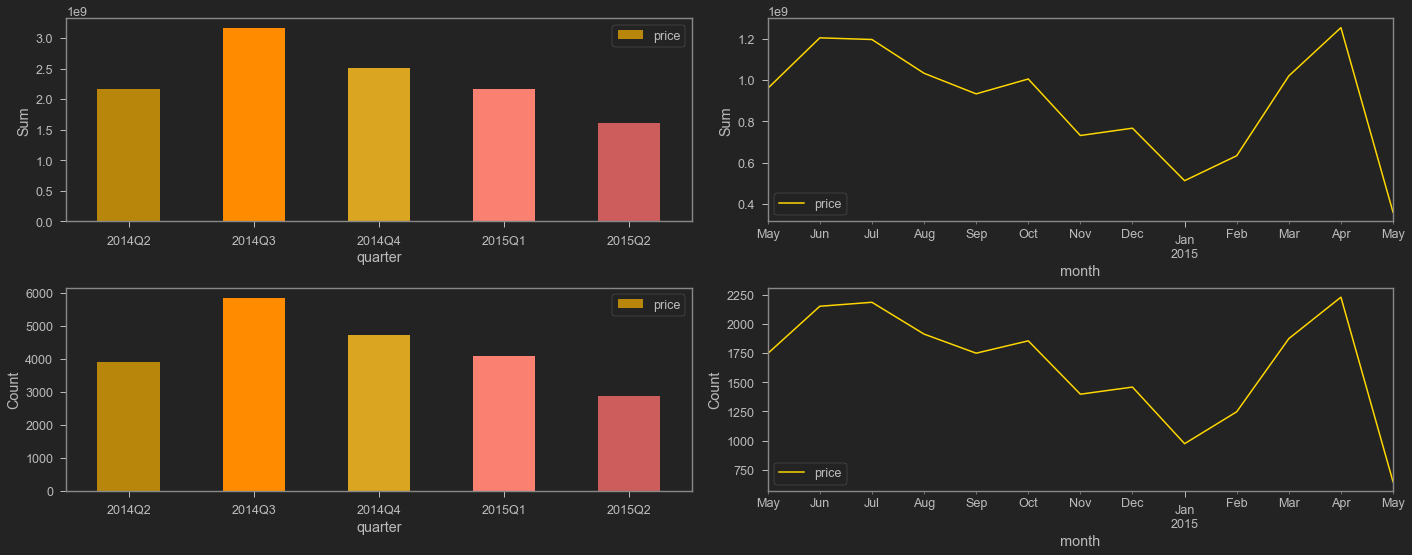

In [36]:
f, axes = plt.subplots(2, 2,figsize=(20,8))
f.tight_layout(pad=2.8)
df1_qtr.plot(kind='bar',x = 'quarter',y = 'price',ax=axes[0][0], color=['#B8860B','darkorange','#DAA520','#FA8072','indianred'],ylabel='Sum',rot=0);
df1_month.plot(kind='line',x = 'month',y = 'price',ax=axes[0][1],color='gold',ylabel='Sum');
df1_qtr2.plot(kind='bar',x = 'quarter',y = 'price',ax=axes[1][0], color=['#B8860B','darkorange','#DAA520','#FA8072','indianred'],ylabel='Count',rot=0);
df1_month2.plot(kind='line',x = 'month',y = 'price',ax=axes[1][1],color='gold',ylabel='Count');

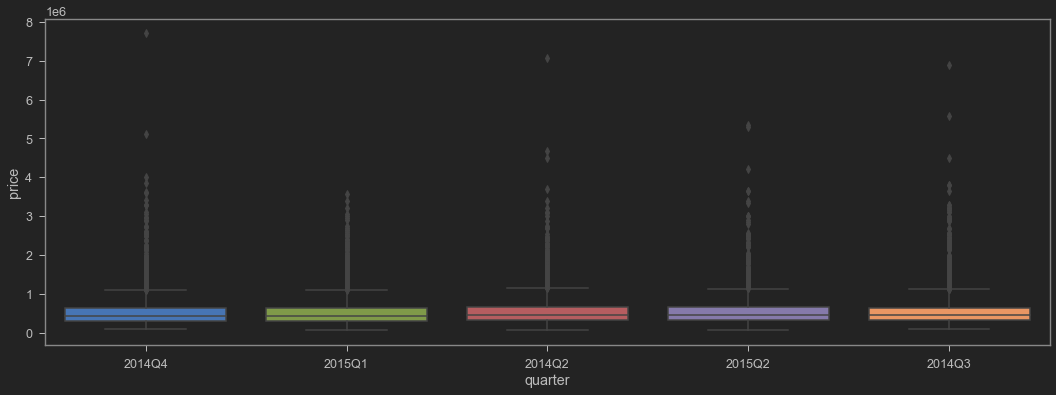

In [37]:
plt.figure(figsize=(18,6))
sns.boxplot(x='quarter',y='price',data=df1);
plt.show()
# Checking the most expensive house sold at what period of time.

On the above charts, we can see the data starts from 2014 May, thus the 2nd Quarter only have 2 months to cumulated. Means, the highest sales happened on 3rd quarter of 2014 then the sales dropped gradually to the 2nd Quarter of 2015.  
Looking at monthly sales, the sales actually dropped from August 2014 and hit the lowest sales on January 2015, then significantly increase and reach the highest sales on Apr 2015 and dropped drastically the next month on May 2015.

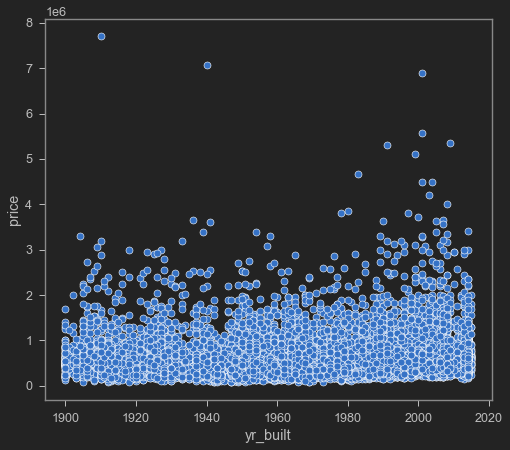

In [38]:
sns.scatterplot(x=df['yr_built'],y=df['price']);

### Data Preparation

In [39]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,quarter,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10,2014Q4,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12,2014Q4,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02,2015Q1,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12,2014Q4,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02,2015Q1,2015


In [40]:
dfDesc1 = []

for i in df1.columns:
    dfDesc1.append([
        i,
        df1[i].dtypes,
        df1[i].isna().sum(),
        ((df1[i].isna().sum())/len(df1) *100).round(2),
        df1[i].nunique(),
        df1[i].unique()
    ])
descr1 = pd.DataFrame(data = dfDesc1, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])
descr1

,Features,D types,Null,Null%,Unique,Unique Value
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087..."
1,date,datetime64[ns],0,0.0,372,"[2014-10-13T00:00:00.000000000, 2014-12-09T00:..."
2,price,float64,0,0.0,3997,"[221900.0, 538000.0, 180000.0, 604000.0, 51000..."
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]"
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060..."
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ..."
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


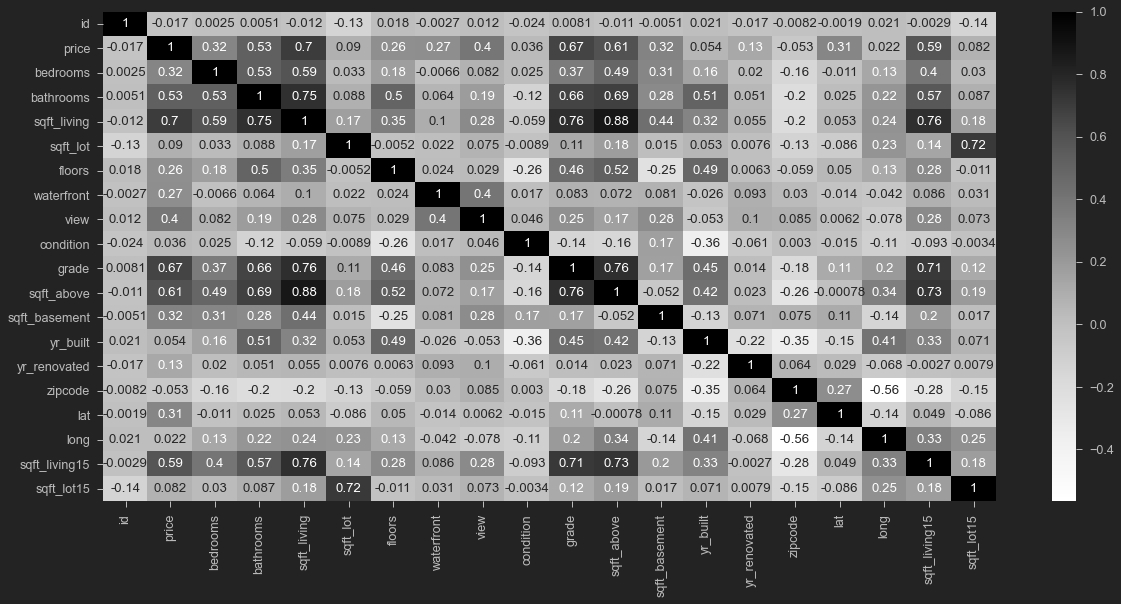

In [37]:

plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot=True,cmap="Greys");

In [42]:
# plt.figure(figsize=(12,9))
# sns.heatmap(data_prep.corr(),annot=True)

In [287]:
data_prep = df1.copy()

In [288]:
data_prep.reset_index(inplace=True)

In [289]:
data_prep.drop(columns=['sqft_living15','id','date','condition','lat','long','sqft_lot15','month','quarter'],inplace=True)

In [635]:
# data_prep[data_prep['yr_renovated']>0]

In [ ]:
Next I want to add feature where year renovated as the true year built then I will convert it to age of the house by substracting `the year with the true year built`

In [ ]:
#### Adding Feature

In [291]:
temp=[]
for i,j in zip(data_prep['yr_renovated'],data_prep['yr_built']):
    if i == 0:
        temp.append(j)
    else:
        temp.append(i)

In [292]:
data_prep['year_built'] = temp

In [293]:
# df1['year'] = df1['year'].astype('float')
data_prep.loc[(data_prep['year_built']>2014) & (data_prep['year']==2014),'year_built'] = 2014
# after taking a good look of the data, we can see some of it have yr_renovated and yr it was sold overlapped. We can just convert it into the right year
# Then I will re run from the data_prep define

In [294]:
data_prep['house_age'] = data_prep['year'] - data_prep['year_built']

In [295]:
data_prep.drop(columns=['yr_built','yr_renovated','year','year_built','index'],inplace=True)

In [632]:
# data_prep[data_prep['house_age']<0] # seems we have an odd data year renovated here that makes the house age have a minus value

In [ ]:
# #### Binning  

# I will recategorized the house age and the zipcode

In [631]:
# dataPrepDesc = []

# for i in data_prep.columns:
#     dataPrepDesc.append([
#         i,
#         data_prep[i].dtypes,
#         data_prep[i].isna().sum(),
#         ((data_prep[i].isna().sum())/len(data_prep) *100).round(2),
#         data_prep[i].nunique(),
#         data_prep[i].unique()
#     ])
# descDP = pd.DataFrame(data = dataPrepDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])
# descDP

In [630]:
# data_prep.describe().T

In [629]:
# bin_age = [0, 20, 40, 60, 115]
# label = ['0-20','21-40 ','41-60','61++']
# data_prep['bin_house_age'] = pd.cut(data_prep['house_age'], bins = bin_age, labels = label)
# data_prep = pd.get_dummies(data=data_prep, columns=['bin_house_age'], prefix_sep='__')

In [57]:
# bin_zipcode = [98001, 98100, 98199]
# label1 = ['98001-98100','98101-98199']
# data_prep['bin_zipcode'] = pd.cut(data_prep['zipcode'], bins = bin_zipcode, labels = label1)
# data_prep = pd.get_dummies(data=data_prep, columns=['bin_zipcode'], prefix_sep='__')

In [58]:
# sns.displot(data=data_prep,x='sqft_living');

In [634]:
# data_prep.shape

### Data Preparation

### Splitting Data

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [560]:
X = df.drop(columns=['price','sqft_basement','id','date','sqft_lot15','sqft_lot']) ### Features / Soal
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 21)

In [561]:
X_train

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
3377,2,1.00,900,1.0,0,0,3,5,900,1940,0,98198,47.4177,-122.319,1350
13257,3,2.50,3870,2.0,0,3,3,9,3870,1997,0,98008,47.5966,-122.112,4030
10495,3,2.50,1890,2.0,0,0,4,8,1890,1992,0,98031,47.3967,-122.183,2000
11187,3,3.25,2320,2.0,0,0,3,9,1930,2014,0,98125,47.7132,-122.293,1700
2662,3,2.25,2240,1.0,0,1,3,7,1190,1980,0,98198,47.3995,-122.318,2080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16580,5,2.50,4250,1.0,0,1,4,11,2490,1984,0,98004,47.6377,-122.211,3620
9036,3,2.75,2216,1.0,0,0,3,9,2216,1968,2005,98092,47.3164,-122.199,2216
5992,2,2.00,1470,2.0,0,0,3,6,1470,2005,0,98038,47.3490,-122.021,1180
5369,1,2.25,1940,2.0,0,0,4,7,1100,1979,0,98133,47.7313,-122.343,1580


### Machine Learning Modelling
- Apply base model Linear Regression

In [562]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [695]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_Lin_reg = model.predict(X_test)
R2_Lin_reg_test = r2_score(y_test, pred_Lin_reg)
R2_Lin_reg_train = model.score(X_train, y_train)
MAE_LR = mean_absolute_error(y_test, pred_Lin_reg)
MSE_LR = mean_squared_error(y_test, pred_Lin_reg)
RMSE_LR = np.sqrt(MSE_LR)
print(f"Training: {model.score(X_train, y_train)}")
print(f'Testing: {R2_Lin_reg}')

Training: 0.6977427753177251
Testing: 0.7037663187413954


## Scalling
Since we had a sqft_living column, I want to scale with sckit-learn package

In [342]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [343]:
# Robust Scaler

In [680]:
scaling_rob = RobustScaler()
X_train_rob = scaling_rob.fit_transform(X_train)
X_test_rob = scaling_rob.fit_transform(X_test)
model.fit(X_train_rob, y_train)
pred_rob = model.predict(X_test_rob)
MAE_rob = mean_absolute_error(y_test, pred_rob)
MSE_rob = mean_squared_error(y_test, pred_rob)
RMSE_rob = np.sqrt(MSE_rob)
R2_rob_test = r2_score(y_test, pred_rob)
R2_rob_train = model.score(X_train_rob, y_train)
print(f"Training: {model.score(X_train_rob, y_train)}")
print(f"Test: {R2_rob}")

Training: 0.697742775317725
Test: 0.7014810901118935


In [ ]:
# Standard Scaler

In [696]:
scaling_std = StandardScaler()
X_train_std = scaling_std.fit_transform(X_train)
X_test_std = scaling_std.fit_transform(X_test)
model.fit(X_train_std, y_train)
pred_std = model.predict(X_test_std)
MAE_std = mean_absolute_error(y_test, pred_std)
MSE_std = mean_squared_error(y_test, pred_std)
RMSE_std = np.sqrt(MSE_std)
R2_std = r2_score(y_test, pred_std)
R2_std_train = model.score(X_train_std, y_train)
print(f"Training: {model.score(X_train_std, y_train)}")
print(f"Test: {R2_std}")

Training: 0.697742775317725
Test: 0.7037090437411702


## Regularization

In [348]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

### Ridge Linear Regression

In [681]:
model_Ridge = Ridge(alpha = 1)
model_Ridge.fit(X_train_std, y_train)
pred_ridge = model_Ridge.predict(X_test_std)
R2_Ridge_test = r2_score(y_test, pred_ridge)
R2_Ridge_train = model_Ridge.score(X_train_std, y_train)
print(f"Training: {model_Ridge.score(X_train_std, y_train)}")
print(f"Testing: {R2_Ridge}")
MAE_base_ridge = mean_absolute_error(y_test, pred_ridge)
MSE_base_ridge = mean_squared_error(y_test, pred_ridge)
RMSE_base_ridge = np.sqrt(MSE_base_ridge)

Training: 0.6977427717354823
Testing: 0.7038028190970376


In [682]:
model_Ridge2 = Ridge(alpha = 100)
model_Ridge2.fit(X_train_std, y_train)
pred_ridge = model_Ridge2.predict(X_test_std)
R2_Ridge_scaled_test = r2_score(y_test, pred_ridge)
R2_Ridge_scaled_train = model_Ridge2.score(X_train_std, y_train)
print(f"Training: {model_Ridge2.score(X_train_std, y_train)}")
print(f"Testing: {R2_Ridge}")
MAE_base_ridge = mean_absolute_error(y_test, pred_ridge)
MSE_base_ridge = mean_squared_error(y_test, pred_ridge)
RMSE_base_ridge = np.sqrt(MSE_base_ridge)

Training: 0.6977101372134008
Testing: 0.7038028190970376


### Lasso Linear Regression

In [683]:
model_Lasso = Lasso(alpha = 150,max_iter=10000)
model_Lasso.fit(X_train_std, y_train)
pred_Lasso = model_Lasso.predict(X_test_std)
R2_Lasso_test = r2_score(y_test, pred_Lasso)
R2_Lasso_train = model_Lasso.score(X_train_std, y_train)
print(f"Training: {model_Lasso.score(X_train_std, y_train)}")
print(f"Testing: {R2_Lasso}")
Lasso_ = mean_absolute_error(y_test, pred_Lasso)
MAE_base_lasso = mean_absolute_error(y_test, pred_Lasso)
MSE_base_lasso = mean_squared_error(y_test, pred_Lasso)
RMSE_base_lasso = np.sqrt(MSE_base_lasso)

Training: 0.6977398738965858
Testing: 0.7037227010026211


In [583]:
model_Lasso2 = Lasso(alpha = 110,max_iter=10000)
model_Lasso2.fit(X_train_std, y_train)
pred_Lasso2 = model_Lasso.predict(X_test_std)
R2_Lasso2 = r2_score(y_test, pred_Lasso2)
print(f"Training: {model_Lasso.score(X_train_std, y_train)}")
print(f"Testing: {R2_Lasso}")
Lasso2_ = mean_absolute_error(y_test, pred_Lasso2)
MAE_base_lasso2 = mean_absolute_error(y_test, pred_Lasso2)
MSE_base_lasso2 = mean_squared_error(y_test, pred_Lasso2)
RMSE_base_lasso2 = np.sqrt(MSE_base_lasso2)

Training: 0.6977398738965858
Testing: 0.7037227010026211


### Polynomial

In [513]:
from sklearn.preprocessing import PolynomialFeatures

In [684]:
poli = PolynomialFeatures()
X_train_poli = poli.fit_transform(X_train)
X_test_poli = poli.fit_transform(X_test)
model.fit(X_train_poli, y_train)
pred_poli = model.predict(X_test_poli)
MAE_poli = mean_absolute_error(y_test, pred_poli)
MSE_poli = mean_squared_error(y_test, pred_poli)
RMSE_poli = np.sqrt(MSE_poli)
R2_poli_test = r2_score(y_test, pred_poli)
R2_poli_train = model.score(X_train_poli, y_train)
print(f"Training: {model.score(X_train_poli, y_train)}")
print(f"Test: {R2_poli}")

Training: 0.8293468243709081
Test: 0.7977755894338435


In [606]:
poli2 = PolynomialFeatures(degree=3, include_bias = False)
X_train_poli2 = poli2.fit_transform(X_train)
X_test_poli2 = poli2.fit_transform(X_test)
model.fit(X_train_poli2, y_train)
pred_poli2 = model.predict(X_test_poli2)
MAE_poli2 = mean_absolute_error(y_test, pred_poli2)
MSE_poli2 = mean_squared_error(y_test, pred_poli2)
RMSE_poli2 = np.sqrt(MSE_poli)
R2_poli2 = r2_score(y_test, pred_poli2)
print(f"Training: {model.score(X_train_poli2, y_train)}")
print(f"Test: {R2_poli2}")

Training: 0.8616134604481452
Test: 0.7370678991939016


## Other Model

### KNN ALGORITHM

In [602]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [603]:
neigh = KNeighborsRegressor()

In [609]:
neigh.fit(X_train, y_train)
pred_neigh_test = neigh.predict(X_test)
R2_neigh = r2_score(y_test, pred_neigh_test)
print(f"Training: {neigh.score(X_train, y_train)}")
print(f"Testing: {R2_neigh}")
MAE_base_knn = mean_absolute_error(y_test, pred_neigh_test)
MSE_base_knn = mean_squared_error(y_test, pred_neigh_test)
RMSE_base_knn = np.sqrt(MSE_base_knn)

Training: 0.6984621249193859
Testing: 0.5626991879428873


In [685]:
neigh.fit(X_train_std, y_train)
pred_neigh_test_scaled = neigh.predict(X_test_std)
R2_neigh_scaled_test = r2_score(y_test, pred_neigh_test_scaled)
R2_neigh_scaled_train = neigh.score(X_train_std, y_train)
print(f"Training: {neigh.score(X_train_std, y_train)}")
print(f"Testing: {R2_neigh_scaled}")

Training: 0.867005683372148
Testing: 0.8079640361512094


### Decision Tree

In [613]:
from sklearn.tree import DecisionTreeRegressor

In [614]:
dtree = DecisionTreeRegressor(random_state=42)

In [707]:
dtree.fit(X_train,y_train)
pred_dtree_test = dtree.predict(X_test)
R2_dtree = r2_score(y_test, pred_dtree_test)
print(f"Training: {dtree.score(X_train, y_train)}")
print(f"Testing: {R2_dtree}")
MAE_base_dtree = mean_absolute_error(y_test, pred_dtree_test)
MSE_base_dtree = mean_squared_error(y_test, pred_dtree_test)
RMSE_base_dtree = np.sqrt(MSE_base_dtree)

Training: 0.9999935031085743
Testing: 0.7458199454527119


In [708]:
R2_dtree_train = dtree.score(X_train, y_train)

In [618]:
dtree.fit(X_train_std,y_train)
pred_dtree_test_scaled = dtree.predict(X_test_std)
R2_dtree_scaled = r2_score(y_test, pred_dtree_test_scaled)
print(f"Training: {dtree.score(X_train_std, y_train)}")
print(f"Testing: {R2_dtree_scaled}")
MAE_base_dtree_scaled = mean_absolute_error(y_test, pred_dtree_test_scaled)
MSE_base_dtree_scaled = mean_squared_error(y_test, pred_dtree_test_scaled)
RMSE_base_dtree_scaled = np.sqrt(MSE_base_dtree_scaled)

Training: 0.9999935031085743
Testing: 0.7388687117351722


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
model_random = RandomForestRegressor()

In [704]:
%%time
model_random.fit(X_train,y_train)
pred_RF= model_random.predict(X_test)
R2_RF = r2_score(y_test, pred_RF)
print(f"Training: {model_random.score(X_train, y_train)}")
print(f"Testing: {R2_RF}")
MAE_base_RF = mean_absolute_error(y_test, pred_RF)
MSE_base_RF = mean_squared_error(y_test, pred_RF)
RMSE_base_RF = np.sqrt(MSE_base_RF)

Training: 0.9829946566841827
Testing: 0.8616182022091106
Wall time: 10.1 s


In [705]:
R2_RF_train = model_random.score(X_train, y_train)
R2_RF_train

0.9829946566841827

In [645]:
%%time
model_random.fit(X_train_std,y_train)
pred_RF_scaled= model_random.predict(X_test_std)
R2_RF_scaled = r2_score(y_test, pred_RF_scaled)
print(f"Training: {model_random.score(X_train_std, y_train)}")
print(f"Testing: {R2_RF_scaled}")
MAE_base_RF_scaled = mean_absolute_error(y_test, pred_RF_scaled)
MSE_base_RF_scaled = mean_squared_error(y_test, pred_RF_scaled)
RMSE_base_RF_scaled = np.sqrt(MSE_base_RF_scaled)

Training: 0.9833657613749859
Testing: 0.858745753687943
Wall time: 10.1 s


### XGB Base

In [624]:
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

In [689]:
base_XGB = XGBRegressor()
base_XGB.fit(X_train, y_train)
y_base_XGB = base_XGB.predict(X_test)
r2_base_XGB = r2_score(y_test, y_base_XGB)
print(f"Training: {base_XGB.score(X_train, y_train)}")
print(f"Testing: {r2_base_XGB}")
MAE_Base_XGB = mean_absolute_error(y_test, y_base_XGB)
MSE_Base_XGB = mean_squared_error(y_test, y_base_XGB)
RMSE_Base_XGB = np.sqrt(MSE_Base_XGB)

Training: 0.9726318613116783
Testing: 0.8859381227104024


In [690]:
r2_base_XGB_train = base_XGB.score(X_train, y_train)

In [644]:
base_XGB = XGBRegressor()
base_XGB.fit(X_train_std, y_train)
y_base_XGB_scaled = base_XGB.predict(X_test_std)
r2_base_XGB_scaled = r2_score(y_test, y_base_XGB_scaled)
print(f"Training: {base_XGB.score(X_train_std, y_train)}")
print(f"Testing: {r2_base_XGB_scaled}")
MAE_Base_XGB_scaled = mean_absolute_error(y_test, y_base_XGB_scaled)
MSE_Base_XGB_scaled = mean_squared_error(y_test, y_base_XGB_scaled)
RMSE_Base_XGB_scaled = np.sqrt(MSE_Base_XGB_scaled)

Training: 0.9726318613116783
Testing: 0.8808177508314605


### HYPER PARAMETER TUNING

#### KNN Hyper Parameter Tuning

In [384]:
knn_tuned = KNeighborsRegressor()

In [638]:
param_knn = {'n_neighbors': [5, 3, 13, 11, 9],
            'weights': ['uniform','distance'],
            'p': [1,2],}

In [639]:
model_KNN = GridSearchCV(estimator=knn_tuned, param_grid=param_knn, n_jobs= -1, cv = 5, verbose= 1)
model_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 3, 13, 11, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [640]:
print(model_KNN.best_params_)
print(model_KNN.best_score_)

{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
0.6012047658944969


In [642]:
KNN_Tuned = model_KNN.best_estimator_
y_tunedKNN = KNN_Tuned.predict(X_test)
r2_tune_KNN = r2_score(y_test, y_tunedKNN)
MAE_tune_KNN = mean_absolute_error(y_test, y_tunedKNN)
MSE_tune_KNN = mean_squared_error(y_test, y_tunedKNN)
RMSE_tune_KNN = np.sqrt(MSE_tune_KNN)
print(f"Training: {KNN_Tuned.score(X_train, y_train)}")
print(f"Testing: {r2_tune_KNN}")

Training: 0.9999935031085743
Testing: 0.6010481115080593


In [691]:
r2_tune_KNN_train = KNN_Tuned.score(X_train, y_train)

### Decision Tree Hyper Parameter Tuning

In [652]:
DT_tuned = DecisionTreeRegressor()
param_DT = {'max_depth': [None, 1, 2, 3, 4, 0.1], 
            'min_samples_split': [2, 9, 15, 25],
            'min_samples_leaf': [1, 3, 5, 7],
            'max_features': [None, .8, .7, .1]}

In [653]:
model_DT = GridSearchCV(DT_tuned, param_grid=param_DT, cv= 5, n_jobs= -1, verbose= 1)
model_DT.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1408 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1905 out of 1920 | elapsed:   11.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   11.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 0.1],
                         'max_features': [None, 0.8, 0.7, 0.1],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 9, 15, 25]},
             verbose=1)

In [654]:
model_DT.best_params_

{'max_depth': None,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 25}

In [655]:
DT_tuned = model_DT.best_estimator_
y_tunedDT = DT_tuned.predict(X_test)
r2_tune_DT = r2_score(y_test, y_tunedDT)
MAE_tune_DT = mean_absolute_error(y_test, y_tunedDT)
MSE_tune_DT = mean_squared_error(y_test, y_tunedDT)
RMSE_tune_DT = np.sqrt(MSE_tune_DT)
print(f"Training: {DT_tuned.score(X_train, y_train)}")
print(f"Testing: {r2_tune_DT}")

Training: 0.9120850965016208
Testing: 0.7862582818454074


In [692]:
r2_tune_DT_train = DT_tuned.score(X_train, y_train)

In [656]:
model_DT.fit(X_train_std, y_train)
DT_tuned_scaled = model_DT.best_estimator_
y_tunedDT_scaled = DT_tuned.predict(X_test_std)
r2_tune_DT_scaled = r2_score(y_test, y_tunedDT_scaled)
MAE_tune_DT_scaled = mean_absolute_error(y_test, y_tunedDT_scaled)
MSE_tune_DT_scaled = mean_squared_error(y_test, y_tunedDT_scaled)
RMSE_tune_DT_scaled = np.sqrt(MSE_tune_DT_scaled)
print(f"Training: {DT_tuned.score(X_train_std, y_train)}")
print(f"Testing: {r2_tune_DT_scaled}")

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    9.6s finished


Training: -0.5488430443732784
Testing: -0.5543645746212806


### Random Forest Hyper Parameter Tuning

In [657]:
RF_tuned = RandomForestRegressor()
param_RF = {'n_estimators': [100, 1000],
            'max_depth': [None, 11],
            'min_samples_split': [2, 7],
            'min_samples_leaf': [1, 3],
            'max_features': [None, .05,.5]}

In [658]:
model_RF = GridSearchCV(RF_tuned, param_grid=param_RF, cv= 4, n_jobs= 4, verbose= 1)

In [659]:
model_RF.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 192 out of 192 | elapsed: 36.3min finished


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [None, 11],
                         'max_features': [None, 0.05, 0.5],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 7],
                         'n_estimators': [100, 1000]},
             verbose=1)

In [660]:
model_RF.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [661]:
RF_tuned = model_RF.best_estimator_
y_tunedRF = RF_tuned.predict(X_test)

In [662]:
r2_tune_RF = r2_score(y_test, y_tunedRF)
MAE_tune_RF = mean_absolute_error(y_test, y_tunedRF)
MSE_tune_RF = mean_squared_error(y_test, y_tunedRF)
RMSE_tune_RF = np.sqrt(MSE_tune_RF)

In [693]:
print(f"Training: {RF_tuned.score(X_train, y_train)}")
print(f"Testing: {r2_tune_RF}")
r2_tune_RF_train = RF_tuned.score(X_train, y_train)

Training: 0.9839677953286966
Testing: 0.8726089287603781


### XGB Hyper Parameter Tuning

In [664]:
XGB_Tuned = XGBRegressor()

In [665]:
param_xgb = {'max_depth': [6,1,5],
             'learning_rate': [0.600000012,0.100000012] , 
             'n_estimators': [100,1000], 
             'gamma': [0,.5], 
             'colsample_bytree': [1,0.5],
             'subsample': [1,0.1], 
             'reg_alpha':[0,0.1] ,
             'reg_lambda': [1,0.9]}

In [666]:
model_XGB = GridSearchCV(XGB_Tuned, param_grid=param_xgb, cv= 4, n_jobs= -1, verbose= 1)

In [667]:
model_XGB.fit(X_train, y_train)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed: 25.4min finished


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [668]:
model_XGB.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.100000012,
 'max_depth': 5,
 'n_estimators': 1000,
 'reg_alpha': 0,
 'reg_lambda': 0.9,
 'subsample': 1}

In [669]:
XGB_tuned = model_XGB.best_estimator_
y_tunedXGB = XGB_tuned.predict(X_test)

In [670]:
r2_tune_XGB = r2_score(y_test, y_tunedXGB)
MAE_tune_XGB = mean_absolute_error(y_test, y_tunedXGB)
MSE_tune_XGB = mean_squared_error(y_test, y_tunedXGB)
RMSE_tune_XGB = np.sqrt(MSE_tune_XGB)

In [694]:
print(f"Training: {XGB_tuned.score(X_train, y_train)}")
print(f"Testing: {r2_tune_XGB}")
r2_tune_XGB_train = XGB_tuned.score(X_train, y_train)

Training: 0.9817772119786595
Testing: 0.893599616066171


In [709]:
data = {
    'Lin_Reg': [MAE_LR,MSE_LR,RMSE_LR,R2_Lin_reg_train,R2_Lin_reg_test],
    'Lin_Reg_scaled': [MAE_std,MSE_std,RMSE_std,R2_std,R2_std],
    'Ridge_scaled' : [MAE_base_ridge,MSE_base_ridge,RMSE_base_ridge,R2_Ridge_train,R2_Ridge_test],
    'Lasso_scaled' : [MAE_base_lasso,MSE_base_lasso,RMSE_base_lasso,R2_Lasso_train,R2_Lasso_test],
    'KNN base scaled': [MAE_base_knn,MSE_base_knn,RMSE_base_knn,R2_neigh_scaled_train,R2_neigh_scaled_test],
    'Decision Tree base scaled':[MAE_base_dtree,MSE_base_dtree,RMSE_base_dtree,R2_dtree_train,R2_dtree],
    'Random Forest base scaled': [MAE_base_RF,MSE_base_RF,RMSE_base_RF,R2_RF_train,R2_RF],
    'XGB base scaled': [MAE_Base_XGB,MSE_Base_XGB,MSE_Base_XGB,r2_base_XGB_train,r2_base_XGB],
    'KNN tuned scaled': [MAE_tune_KNN,MSE_tune_KNN,RMSE_tune_KNN,r2_tune_KNN_train,r2_tune_KNN],
    'Decision Tree tuned scaled': [MAE_tune_DT,MSE_tune_DT,RMSE_tune_DT,r2_tune_DT_train,r2_tune_DT],
    'Randon Foreset tuned scaled': [MAE_tune_RF,MSE_tune_RF,RMSE_tune_RF,r2_tune_RF_train,r2_tune_RF],
    'XGB tuned scaled': [MAE_tune_XGB,MSE_tune_XGB,RMSE_tune_XGB,r2_tune_XGB_train,r2_tune_XGB],
    'Polynomial': [MAE_poli,MSE_poli,RMSE_poli,R2_poli_train,R2_poli_test]
}
pd.DataFrame(data=data, index=['MAE','MSE','RMSE','R2 train', 'R2 test']).T.sort_values('R2 test',ascending=False)

,MAE,MSE,RMSE,R2 train,R2 test
XGB tuned scaled,66487.284650,1.402133e+10,1.184117e+05,0.981777,0.893600
XGB base scaled,69569.713935,1.503096e+10,1.503096e+10,0.972632,0.885938
Randon Foreset tuned scaled,69802.570105,1.678746e+10,1.295664e+05,0.983968,0.872609
Random Forest base scaled,71214.631902,1.823581e+10,1.350400e+05,0.982995,0.861618
KNN base scaled,155308.059422,5.762705e+10,2.400563e+05,0.867006,0.807964
Polynomial,103559.150503,2.664892e+10,1.632450e+05,0.829347,0.797776
Decision Tree tuned scaled,90751.214212,2.816666e+10,1.678293e+05,0.912085,0.786258
Decision Tree base scaled,100267.949160,3.349558e+10,1.830180e+05,0.999994,0.745820
Lin_Reg,125075.923702,3.903737e+10,1.975788e+05,0.697743,0.703766
Lasso_scaled,124854.112662,3.904312e+10,1.975933e+05,0.697740,0.703723


In [42]:
# plt.figure(figsize=(12,8))
# plt.yticks(size=15)

# feat_imp = pd.Series(model_random.feature_importances_, X.columns).sort_values(ascending = True).tail(10)
# feat_imp.plot(kind = 'barh', title = 'Feature Importance')

## Conclusion
- The best R2_score are using XGB tuned scaled, but the best fit would be using Polynomial because it just right, not overfit.
- bedrooms, bathrooms, sqft_living, floors, waterfront, view, grade, location are have an great impact on house prices.
- sqft lot does not give any effect of the price.

## Suggestion
- If your house have more than 2 bedrooms and bathrooms, has a waterfront, has a good quality/grade of building, has a good view andif your house is located around the top 100 most expensive house as shown above, you can sell it with big amount of price.
- The best time to listed your house is before the 3rd Quarter of the year, because the data shows that the highest sales happened on the 3rd Quarter of the year.

In [286]:
# # Zipping locations for folium map
# locations = list(zip(df['lat'].values, df['long'].values))

# # Creating a map using folium
# map1 = folium.Map(
#     location=[47.5112, -122.257],
#     zoom_start=11.5
# )

# # Plugin: FastMarkerCluster
# FastMarkerCluster(data=locations).add_to(map1)

# map1